## **DATA EXPLORATION AND PREPROCESSING** ##

[MediaPipe](https://colab.research.google.com/drive/1Akr_j0nxG2H1Gcns-RlORo9FP2jJ5cmR#scrollTo=72d9a10b) provides a robust solution capable of predicting thirty-three 3D landmarks on a human body in real-time with high accuracy even on CPU. It utilizes a two-step machine learning pipeline, by using a detector it first localizes the person within the frame and then uses the pose landmarks detector to predict the landmarks within the region of interest. When the tracker loses track of the identify body pose presence in a frame, the detector is invoked again for the next frame which reduces the computation and latency.

**The image below shows the thirty-three pose landmarks along with their indexes.**

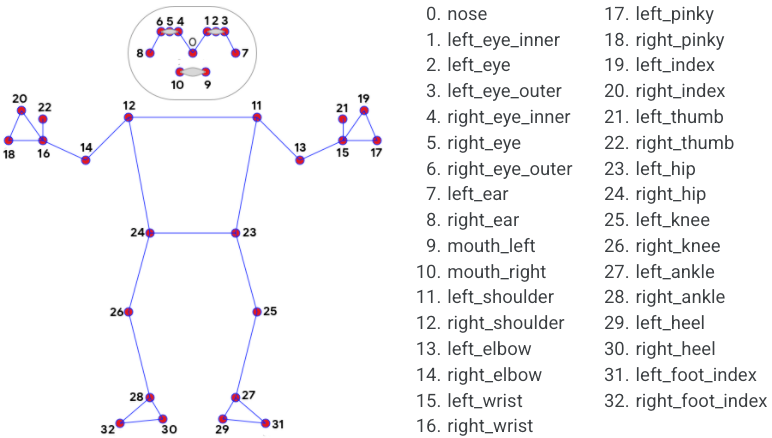

## **Install and Import Libraries** ##
Let's start by importing the required libraries

In [8]:
# pip install SpeechRecognition
# pip install mediapipe
# pip install PyAudio

In [17]:
import cv2
import mediapipe as mp
import math
import numpy as np
import speech_recognition as sr
import matplotlib.pyplot as plt
import threading
import time

## **Initialize the Pose Detection Model** ##

In [11]:
# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

## **Read an Image of the expected pose to be detected**##

Now we will read a sample image using the function [**`cv2.imread()`**](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56) and then display that image using the [**`matplotlib`**](https://matplotlib.org/stable/index.html) library.

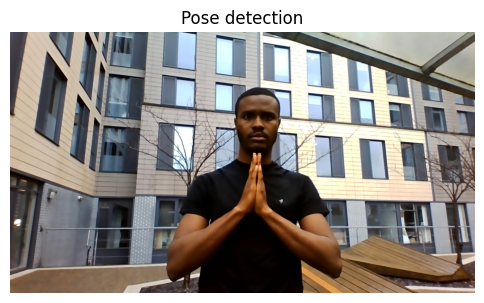

In [22]:
# Read an image from the specified path.
sample_img = cv2.imread('Poses/WIN_20240208_13_38_11_Pro.jpg')

# Specify a size of the figure.
plt.figure(figsize = [6, 6])

# Display the sample image, also convert BGR to RGB for display.
plt.title("Pose detection");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

## **Perform Pose Detection** ##

In [23]:
# Perform pose detection after converting the image into RGB format.
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

# Check if any landmarks are found.
if results.pose_landmarks:

    # Iterate two times as we only want to display first two landmarks.
    for i in range(2):

        # Display the found normalized landmarks.
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE:
x: 0.5389713048934937
y: 0.3655935525894165
z: -0.34378454089164734
visibility: 0.9999117851257324

LEFT_EYE_INNER:
x: 0.5494140386581421
y: 0.3356119394302368
z: -0.31092894077301025
visibility: 0.99981290102005



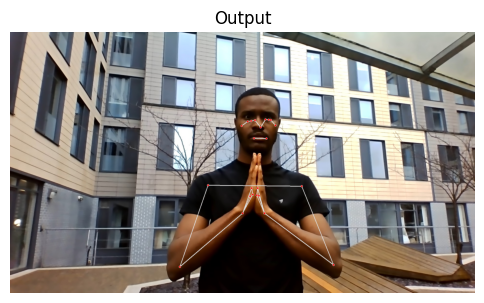

In [25]:
# Create a copy of the sample image to draw landmarks on.
img_copy = sample_img.copy()

# Draw Pose landmarks on the sample image.
mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)

# Specify a size of the figure.
fig = plt.figure(figsize = [6, 6])

# Display the output image with the landmarks drawn, also convert BGR to RGB for display.
plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()


## **POSE DETECTION AND CLASSIFICATION ON STATIC IMAGE** ##

# *Write a function that will calculate the landmark angles from the image above* #

In [27]:

# Function to calculate angle between three points
def calculate_angle(a, b, c):
    a = np.array(a)  # First
    b = np.array(b)  # Mid
    c = np.array(c)  # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle > 180.0:
        angle = 360-angle
        
    return angle

# Load an image
image_path = 'Poses/fdb49812abecfaaa_Tree-Pose-ezgif.com-crop.jpg'  
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Detect pose
results = pose.process(image_rgb)

# Check if a pose was detected
if results.pose_landmarks:
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    
    landmarks = results.pose_landmarks.landmark
    
    # Example for calculating angle between left shoulder, left elbow, and left wrist
    shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
    elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
    wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

    shoulder1 = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
    elbow1 = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
    wrist1 = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
    
    left_angle = calculate_angle(shoulder, elbow, wrist)
    right_angle = calculate_angle(shoulder1, elbow1, wrist1)

    # Check if the pose is a Tree Pose
    # Note: You need to define the correct angle threshold for the Tree Pose based on your application's need
    if left_angle > 20 and left_angle < 36 and right_angle > 20 and right_angle < 36:  # Example threshold, adjust based on your needs
        print("Pose Detected")
    else:
        print("No Pose Detected")
else:
    print("No human figure detected.")

# Display the image with pose detection
cv2.imshow('Pose Detection', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Pose Detected


## **Load another image** ##

In [29]:

# Function to calculate angle between three points
def calculate_angle(a, b, c):
    a = np.array(a)  # First
    b = np.array(b)  # Mid
    c = np.array(c)  # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle > 180.0:
        angle = 360-angle
        
    return angle

# Load an image
image_path = 'Poses/energising-yoga.jpg'  
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Detect pose
results = pose.process(image_rgb)

# Check if a pose was detected
if results.pose_landmarks:
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    
    landmarks = results.pose_landmarks.landmark
    
    # Example for calculating angle between left shoulder, left elbow, and left wrist
    shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
    elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
    wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

    shoulder1 = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
    elbow1 = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
    wrist1 = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
    
    left_angle = calculate_angle(shoulder, elbow, wrist)
    right_angle = calculate_angle(shoulder1, elbow1, wrist1)

    # Check if the pose is a Tree Pose
    # Note: You need to define the correct angle threshold for the Tree Pose based on your application's need
    if left_angle > 20 and left_angle < 36 and right_angle > 20 and right_angle < 36:  # Example threshold, adjust based on your needs
        print("Pose Detected")
    else:
        print("No Pose Detected")
else:
    print("No human figure detected.")

# Display the image with pose detection
cv2.imshow('Pose Detection', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

No Pose Detected


## **MAKE IT LIVE; TO RUN ON WEBCAM** ##

In [30]:



# Start webcam capture
cap = cv2.VideoCapture(0)  # '0' is typically the default ID for the primary webcam

try:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            print("Ignoring empty camera frame.")
            continue

        # Convert the image color from BGR to RGB for MediaPipe
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = pose.process(image_rgb)

        # Draw the pose annotation on the image
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # Calculate and classify pose if landmarks are detected
        if results.pose_landmarks:
            landmarks = results.pose_landmarks.landmark

            # Calculate angles for left arm
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, 
                        landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, 
                     landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, 
                     landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

            shoulder1 = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, 
                        landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            elbow1 = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, 
                     landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            wrist1 = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, 
                     landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            
            left_angle = calculate_angle(shoulder, elbow, wrist)
            right_angle = calculate_angle(shoulder1, elbow1, wrist1)

            # Define the correct angle threshold for the Tree Pose
            if left_angle > 20 and left_angle < 36 and right_angle > 20 and right_angle < 36:
            #if 20 <= left_angle <= 36:
                #if 20 <= right_angle <= 36:
                cv2.putText(image, 'Pose Detected', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
            else:
                cv2.putText(image, 'No Pose Detected', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
        else:
            cv2.putText(image, 'No human figure detected.', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

        # Display the image with pose detection
        cv2.imshow('Pose Detection', image)

        # Break the loop when 'q' is pressed
        if cv2.waitKey(5) & 0xFF == ord('q'):
            break

finally:
    cap.release()
    cv2.destroyAllWindows()

## **ADD SPEECH RECOGNITION AND SPECIAL EFFECT** ##

## The speech to be recognized is **LOVE** ##

In [21]:
import cv2
import mediapipe as mp
import numpy as np
import speech_recognition as sr
import threading

# Function to calculate angle between three points
def calculate_angle(a, b, c):
    a = np.array(a)  # First
    b = np.array(b)  # Mid
    c = np.array(c)  # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle > 180.0:
        angle = 360 - angle
        
    return angle

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# Initialize recognizer and microphone
r = sr.Recognizer()
mic = sr.Microphone()

# Speech recognition variables
keyword_detected = False
pose_detected = False  # Flag to indicate if the pose is detected

# Function for speech recognition
def recognize_speech():
    global keyword_detected
    recognizer = sr.Recognizer()
    microphone = sr.Microphone()
    
    with microphone as source:
        recognizer.adjust_for_ambient_noise(source)
        
    while True:
        if pose_detected:  # Check if pose is detected before recognizing speech
            try:
                with microphone as source:
                    print("Listening for keyword...")
                    audio = recognizer.listen(source, timeout=5)
                    speech_as_text = recognizer.recognize_google(audio)
                    print("You said: " + speech_as_text)
                    
                    if "love" in speech_as_text.lower():
                        print("Keyword Detected!")
                        keyword_detected = True
                        break  # Optionally break the loop if keyword is detected
            except sr.UnknownValueError:
                print("Google Speech Recognition could not understand audio")
            except sr.RequestError as e:
                print("Could not request results from Google Speech Recognition service; {0}".format(e))


# Start the speech recognition in a separate thread
threading.Thread(target=recognize_speech, daemon=True).start()

# Start webcam capture
cap = cv2.VideoCapture(0)  # '0' is typically the default ID for the primary webcam

try:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            print("Ignoring empty camera frame.")
            continue

        # Convert the image color from BGR to RGB for MediaPipe
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = pose.process(image_rgb)

        # Draw the pose annotation on the image
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # Reset the pose_detected flag for each frame
        pose_detected = True

        # Calculate and classify pose if landmarks are detected
        if results.pose_landmarks:
            landmarks = results.pose_landmarks.landmark

            # Calculate angles
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, 
                        landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, 
                     landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, 
                     landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

            shoulder1 = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, 
                         landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            elbow1 = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, 
                      landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            wrist1 = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, 
                      landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            
            left_angle = calculate_angle(shoulder, elbow, wrist)
            right_angle = calculate_angle(shoulder1, elbow1, wrist1)

            # Define the correct angle threshold for the Tree Pose
            if left_angle > 20 and left_angle < 36 and right_angle > 20 and right_angle < 36:
                cv2.putText(image, 'Pose Detected', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
                if pose_detected and keyword_detected:
                    image = cv2.transform(image, np.array([[0.272, 0.534, 0.131], [0.349, 0.686, 0.168], [0.393, 0.769, 0.189]]))
            else:
                cv2.putText(image, 'No Pose Detected', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

                
        # Check both pose and keyword detection
        #if pose_is_correct and keyword_detected:
            # This is where you'd trigger your special action
            #cv2.putText(image, 'Special Action Triggered!', (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2, cv2.LINE_AA)
            # Apply a sepia effect
            #image = cv2.transform(image, np.array([[0.272, 0.534, 0.131], [0.349, 0.686, 0.168], [0.393, 0.769, 0.189]]))

        pose_detected = True
        
        # Display the image with pose detection
        cv2.imshow('Pose Detection', image)


        # Break the loop when 'q' is pressed
        if cv2.waitKey(5) & 0xFF == ord('q'):
            break

finally:
    cap.release()
    cv2.destroyAllWindows()

Listening for keyword...
Google Speech Recognition could not understand audio
Listening for keyword...
You said: love
Keyword Detected!
